# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.rand(3, 4)
b = torch.rand(12)

In [ ]:
a

tensor([[0.0496, 0.3724, 0.1271, 0.1081],
        [0.9432, 0.3741, 0.1893, 0.5660],
        [0.2195, 0.2523, 0.2520, 0.2241]])

In [ ]:
b

tensor([0.0278, 0.5573, 0.7231, 0.9914, 0.8846, 0.1327, 0.4900, 0.0392, 0.8637,
        0.3760, 0.6314, 0.2505])

In [ ]:
c = b.reshape(2, 2, 3)
c

tensor([[[0.0278, 0.5573, 0.7231],
         [0.9914, 0.8846, 0.1327]],

        [[0.4900, 0.0392, 0.8637],
         [0.3760, 0.6314, 0.2505]]])

In [ ]:
a[:, 0]

tensor([0.0496, 0.9432, 0.2195])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.rand(5, 2)
b = torch.rand(1, 10)

In [ ]:
a

tensor([[0.2117, 0.1319],
        [0.5642, 0.8132],
        [0.0313, 0.3413],
        [0.3094, 0.1033],
        [0.7226, 0.3818]])

In [ ]:
b

tensor([[0.2449, 0.9452, 0.1994, 0.6360, 0.3360, 0.0123, 0.2402, 0.9596, 0.8800,
         0.5194]])

In [ ]:
c = b.reshape(5, 2)
c

tensor([[0.2449, 0.9452],
        [0.1994, 0.6360],
        [0.3360, 0.0123],
        [0.2402, 0.9596],
        [0.8800, 0.5194]])

In [ ]:
a.add(c)

tensor([[0.4567, 1.0771],
        [0.7636, 1.4492],
        [0.3674, 0.3536],
        [0.5496, 1.0629],
        [1.6026, 0.9012]])

In [ ]:
a.sub(c)

tensor([[-0.0332, -0.8133],
        [ 0.3647,  0.1771],
        [-0.3047,  0.3290],
        [ 0.0692, -0.8563],
        [-0.1574, -0.1376]])

In [ ]:
a.div(c)

tensor([[ 0.8645,  0.1395],
        [ 2.8288,  1.2785],
        [ 0.0933, 27.6763],
        [ 1.2882,  0.1077],
        [ 0.8211,  0.7351]])

In [ ]:
a.mul(c)

tensor([[0.0519, 0.1247],
        [0.1125, 0.5172],
        [0.0105, 0.0042],
        [0.0743, 0.0991],
        [0.6359, 0.1983]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
images = torch.zeros(100, 200, 200, 3)

In [ ]:
for idx in range(images.shape[0]):
  images[idx][2*idx : 2*idx + 2] = 255

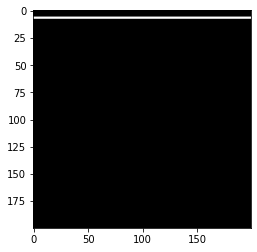

In [ ]:
plt.imshow(images[3])

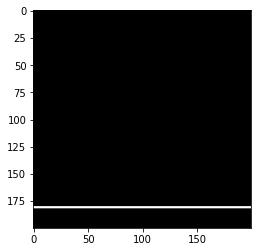

In [ ]:
plt.imshow(images[90])

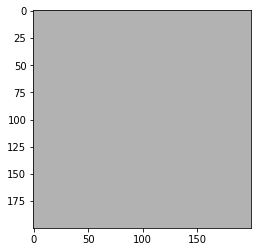

In [ ]:
plt.imshow((images.float().mean(0) * 70).int())

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
a = torch.rand(2, 3, 4).uniform_().cuda()
b = torch.rand(1, 8, 3).uniform_().cuda()

In [ ]:
a

tensor([[[0.2735, 0.8439, 0.8098, 0.2179],
         [0.2624, 0.5740, 0.7569, 0.4239],
         [0.9304, 0.7389, 0.4334, 0.5888]],

        [[0.9908, 0.4589, 0.0414, 0.7881],
         [0.2720, 0.0245, 0.1215, 0.6518],
         [0.5443, 0.8180, 0.4546, 0.7935]]], device='cuda:0')

In [ ]:
b

tensor([[[0.2479, 0.8203, 0.6949],
         [0.0469, 0.3189, 0.9998],
         [0.1246, 0.2298, 0.2692],
         [0.5085, 0.9368, 0.4191],
         [0.0302, 0.5201, 0.8271],
         [0.6030, 0.5526, 0.2855],
         [0.3768, 0.7955, 0.6231],
         [0.9046, 0.4218, 0.5149]]], device='cuda:0')

In [ ]:
c = b.reshape(a.shape)

In [ ]:
c.shape == a.shape

True

In [ ]:
a = a.cpu()
c = c.cpu()

In [ ]:
a, c = Variable(a), Variable(c, requires_grad=True)

In [ ]:
L = torch.mean((c - a)**2)
L.backward()
c.grad

tensor([[[-0.0021, -0.0020, -0.0096, -0.0142],
         [ 0.0047,  0.0355, -0.0527, -0.0162],
         [-0.0551, -0.0192,  0.0419, -0.0141]],

        [[-0.0800,  0.0051,  0.0655, -0.0154],
         [ 0.0234,  0.0217,  0.0213,  0.0120],
         [ 0.0066,  0.0072, -0.0027, -0.0232]]])